In [14]:
%pip install lightphe
from lightphe import LightPHE

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [15]:
cs =LightPHE(algorithm_name="Paillier",key_size=1024)

In [16]:
cs.export_keys(target_file="public.txt", public=True)

In [17]:
m1 = 1000 # base salary
c1 = cs.encrypt(m1)

In [18]:
c1

Ciphertext(10191311899150023384427114653990512618410593685619366565558123933060049871391228030521778128834969527929504170738882692184336146433935386518993262310205736983731681741352180199916182574921414683050548522667887630762932777612977493463111431306680332351782237073946561419734639918893445972382397574871882242895364939431709726279846286096704626796237580809599849682136398213270192255132194028097264913125858893205581962319016733290701492347245248012082012889249042657702095037709801011396887016922283918282851543005593643259137220222102714046813838462746867735290712888878777413278210556226600118593369135737980814219458)

In [19]:
m2 = 2000
c2=cs.encrypt(m2)

In [20]:
c2

Ciphertext(16628820461249933616307550337977300242954609814768595287783683269338014453390888802632281309433658423238699555360808491843726493832027617024324477550151936930643581694806257397221027584942650610998369824537021700964418092864273273240161133787542383769796862455223035845804726081695144969670268292936676208542116852083550605250824263569002615588635869631512981016543735470677432242049395041905391773900954155200952870753174548847677970373510036591779622763706960648075676132384507463592397447387742985729851753859650543828232222294951164905130074223472751248657674439950679906214690567654405369099299792553387400107921)

In [21]:
cs.decrypt(c1)

1000

In [22]:
c3=c1+c2
c3

Ciphertext(13543084607697750057773953220371580109711298512122648175168849459383333606762245503622082785513106122761402664212014276344744375643187750031510405882322242619994830130923142031195279118935698531184201593236650965863026570446526423399917836570855126948432577562074509634835593147853063549230061046019086471853827484916569861016371100225332761184647569658694156217436333245841045223625964926333290711460996157848394008065045779202951776666394346235970115908080351517881500685968290623924215580355837636007363952485485405900978165768320485182056881209317772966686988613842846740215478339015549472043110745583536250909817)

In [23]:
cs.decrypt(c2)

2000

In [24]:
c3 = cs.create_ciphertext_obj(201527297927272334605277315884343120369032678414039397710367597832953065248415544049922820983611517782886270229941182230657194137966454717355383074474131382442643328113388176289069434025883010814098840875844485046491105169529170426107034517583513420339637065426473349812459409909936051649727505439023518077697050320412720799945870070964387328711722222113481582097781470548783978033245343646780636644209824643533389416463461645082911412006818711823967751393668660829849101567039918961544474060690994668120298472501596210678337003817601316206253845102843437704564234193738500093405309365048246475092358229716867365525)

In [27]:
assert cs.decrypt(c3)== m1 + m2 

AssertionError: 

In [18]:
c1 ^c2

ValueError: Paillier is not homomorphic with respect to the exclusive or

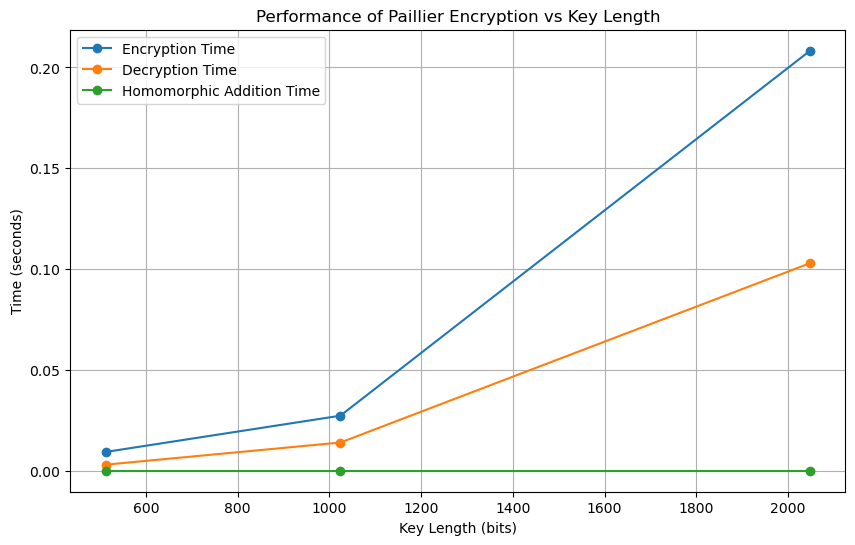

In [28]:
import time
import matplotlib.pyplot as plt
from lightphe import LightPHE

# Varying key lengths
key_lengths = [512, 1024, 2048]
encrypt_times = []
decrypt_times = []
homomorphic_times = []

# Test messages
m1 = 1000
m2 = 2000

for key_size in key_lengths:
    # Initialize cryptosystem with current key size
    cs = LightPHE(algorithm_name="Paillier", key_size=key_size)

    # Measure encryption time
    start_time = time.time()
    c1 = cs.encrypt(m1)
    c2 = cs.encrypt(m2)
    encrypt_times.append(time.time() - start_time)

    # Measure homomorphic addition time
    start_time = time.time()
    c3 = c1 + c2
    homomorphic_times.append(time.time() - start_time)

    # Measure decryption time
    start_time = time.time()
    decrypted_c3 = cs.decrypt(c3)
    decrypt_times.append(time.time() - start_time)

    # Ensure correctness
    assert decrypted_c3 == m1 + m2

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(key_lengths, encrypt_times, label='Encryption Time', marker='o')
plt.plot(key_lengths, decrypt_times, label='Decryption Time', marker='o')
plt.plot(key_lengths, homomorphic_times, label='Homomorphic Addition Time', marker='o')

plt.title("Performance of Paillier Encryption vs Key Length")
plt.xlabel("Key Length (bits)")
plt.ylabel("Time (seconds)")
plt.legend()
plt.grid()
plt.show()


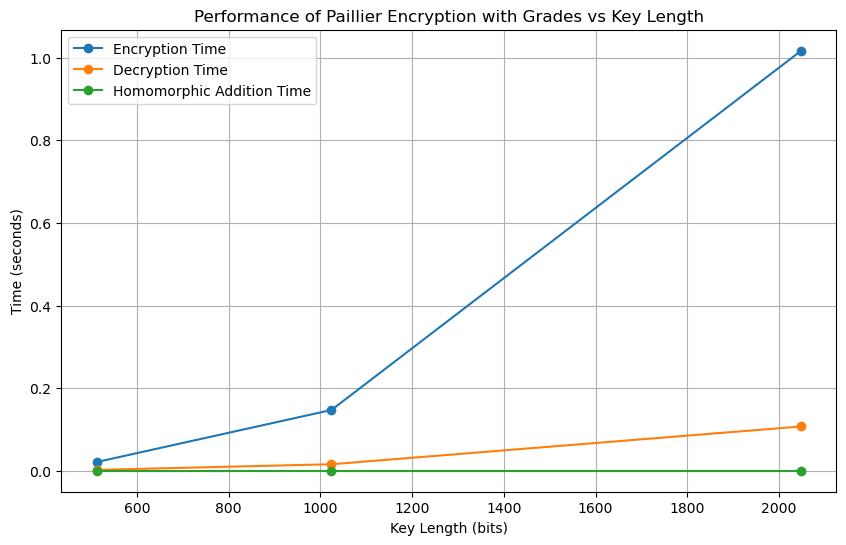

In [1]:
import time
import json
import matplotlib.pyplot as plt
from lightphe import LightPHE

# Load grades from the JSON file
with open("students_grades.json", "r") as f:
    students_data = json.load(f)

# Extract grades
grades = [student["grade"] for student in students_data]

# Varying key lengths
key_lengths = [512, 1024, 2048]
encrypt_times = []
decrypt_times = []
homomorphic_times = []

for key_size in key_lengths:
    # Initialize cryptosystem with current key size
    cs = LightPHE(algorithm_name="Paillier", key_size=key_size)

    # Measure encryption time for all grades
    encrypted_grades = []
    start_time = time.time()
    for grade in grades:
        encrypted_grades.append(cs.encrypt(grade))
    encrypt_times.append(time.time() - start_time)

    # Measure homomorphic addition time (sum of all grades)
    start_time = time.time()
    total_encrypted = encrypted_grades[0]
    for enc_grade in encrypted_grades[1:]:
        total_encrypted += enc_grade
    homomorphic_times.append(time.time() - start_time)

    # Measure decryption time for the total
    start_time = time.time()
    total_decrypted = cs.decrypt(total_encrypted)
    decrypt_times.append(time.time() - start_time)

    # Ensure correctness
    assert total_decrypted == sum(grades), "Decryption or addition failed!"

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(key_lengths, encrypt_times, label='Encryption Time', marker='o')
plt.plot(key_lengths, decrypt_times, label='Decryption Time', marker='o')
plt.plot(key_lengths, homomorphic_times, label='Homomorphic Addition Time', marker='o')

plt.title("Performance of Paillier Encryption with Grades vs Key Length")
plt.xlabel("Key Length (bits)")
plt.ylabel("Time (seconds)")
plt.legend()
plt.grid()
plt.show()


Testing Paillier...
Testing Damgard-Jurik...
Testing ElGamal...


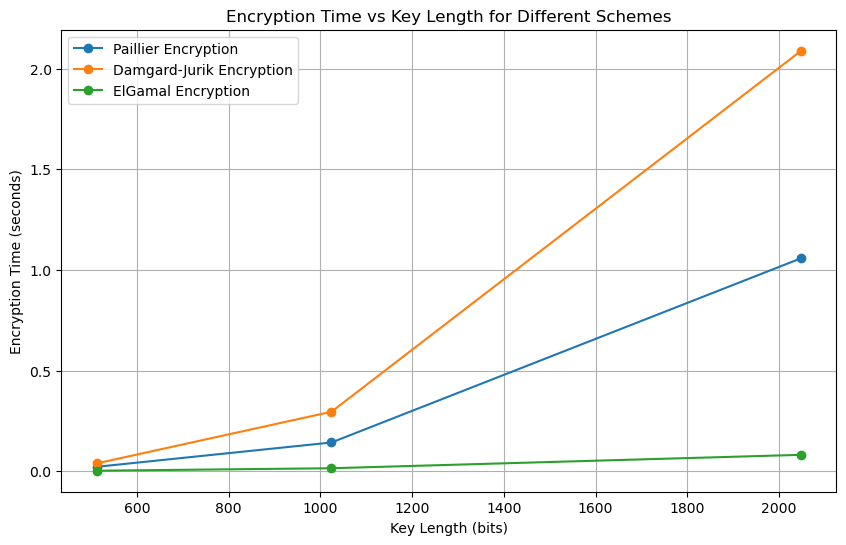

In [3]:
import time
import json
import matplotlib.pyplot as plt
from lightphe import LightPHE

# Load grades from the JSON file
with open("students_grades.json", "r") as f:
    students_data = json.load(f)

# Extract grades
grades = [student["grade"] for student in students_data]

# Varying key lengths
key_lengths = [512, 1024, 2048]

# Store performance times for each scheme
performance = {
    "Paillier": {"encryption": []},
    "Damgard-Jurik": {"encryption": []},
    "ElGamal": {"encryption": []}
}

# Iterate over the schemes
schemes = ["Paillier", "Damgard-Jurik", "ElGamal"]
for scheme in schemes:
    print(f"Testing {scheme}...")
    for key_size in key_lengths:
        # Initialize cryptosystem for the current scheme and key size
        cs = LightPHE(algorithm_name=scheme, key_size=key_size)

        # Measure encryption time for all grades
        start_time = time.time()
        for grade in grades:
            cs.encrypt(grade)
        performance[scheme]["encryption"].append(time.time() - start_time)

# Plot only encryption times
plt.figure(figsize=(10, 6))
for scheme in schemes:
    plt.plot(key_lengths, performance[scheme]["encryption"], label=f'{scheme} Encryption', marker='o')

plt.title("Encryption Time vs Key Length for Different Schemes")
plt.xlabel("Key Length (bits)")
plt.ylabel("Encryption Time (seconds)")
plt.legend()
plt.grid()
plt.show()


In [4]:
import json
from lightphe import LightPHE

# Load grades from the JSON file
with open("students_grades.json", "r") as f:
    students_data = json.load(f)

# Extract grades from the data
grades = [student["grade"] for student in students_data]

# Define the encryption function
def encrypt_grades(grades, algorithm_name, key_size, filename):
    """
    Encrypts a list of grades using a homomorphic encryption algorithm and saves the encrypted values to a file.
    
    :param grades: List of grades to encrypt.
    :param algorithm_name: The encryption algorithm to use (e.g., 'Paillier', 'Damgard-Jurik', 'ElGamal').
    :param key_size: The key size for the encryption algorithm (e.g., 512, 1024, 2048).
    :param filename: The file name where encrypted values will be saved.
    """
    # Initialize the cryptosystem
    cs = LightPHE(algorithm_name=algorithm_name, key_size=key_size)
    
    # Encrypt each grade
    encrypted_grades = [cs.encrypt(grade) for grade in grades]

    # Save the encrypted values to a file
    with open(filename, "w") as f:
        for encrypted_grade in encrypted_grades:
            f.write(str(encrypted_grade) + "\n")

    print(f"Encrypted grades have been saved to {filename}")

# Example usage:
algorithm_name = "Paillier"  # You can change this to "Damgard-Jurik" or "ElGamal"
key_size = 1024  # Set the desired key size
filename = "encrypted_grades.txt"  # File to save the encrypted grades

# Encrypt and save the grades
encrypt_grades(grades, algorithm_name, key_size, filename)


Encrypted grades have been saved to encrypted_grades.txt
